HW 2 MATH/BIOL6397 Manoj Subedi Codes for Q N 1 and Q N 2 and Q N 3

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def ssa(x,T):
    t_x=[0]            #reaction time
    i=0
    v=np.array([[1,0],[-1,0],[0,1],[0,-1],[-1,-1]])
    while t_x[i]<T:
        a=np.array([k,a1*x[i,0],k,a2*x[i,1],ka*x[i,0]*x[i,1]])
        sum_a=np.sum(a)
        cumsum_a=np.cumsum(a,axis=0)
        epsilon=np.random.uniform(0,1,2)
        j=np.min(np.where(epsilon[0]*sum_a<cumsum_a)) 
        tau=(np.log(1/epsilon[1]))/sum_a
        x=np.append(x,[x[i,:]+v[j,:]],axis=0)
        t_x=np.append(t_x,[t_x[i]+tau])   
        i+=1
        if x[i,0]==0 and x[i,1]==0:
            ##print([x[i,:],t_x[i]])
            break
    return x,t_x

This is Gillespie algorithm for chemical reaction with first sets of rate constants.

In [3]:
k=10
a1=1e-6
a2=1e-5
ka=1e-5
x,t=ssa(np.array([[2, 100]]),1000)

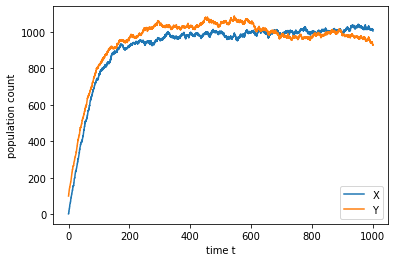

In [4]:
#plt.plot(t,x)
plt.plot(t,x)
plt.xlabel('time t')
plt.ylabel('population count')
plt.legend(['X','Y'],loc='lower right')


This is Gillespie Algorithm for second set of rate constants.

In [5]:
k=1000
a1=1e-4
a2=1e-3
ka=1e-3
u,v=ssa(np.array([[2, 100]]),50)

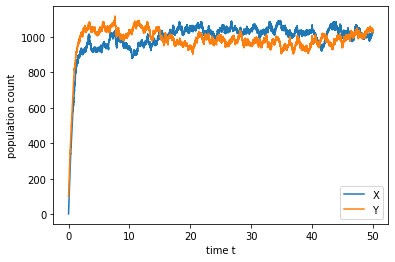

In [6]:
#plt.plot(t,x)
plt.plot(v,u)
plt.xlabel('time t')
plt.ylabel('population count')
plt.legend(['X','Y'],loc='lower right')

In [7]:
z=np.std(u[:,0])
w=np.std(u[:,1])
print(z)
print(w)

88.86844486949136
73.10547653840268


This is for autoregulation QN 3

In [8]:
def ssa(x,T):
    #molecule count    x=[A,rA,B,rB]
    t_x=[0]            #reaction time
    i=0
    v=np.array([[1,0],[-1,0],[0,1],[0,-1]])
    while t_x[i]<T:
        phi=k0*((x[i,1]/K)**(n))/(1+(x[i,1]/K)**(n))
        a=np.array([kl+phi,gr*x[i,0],kp*x[i,0],gp*x[i,1]])
        sum_a=np.sum(a)
        cumsum_a=np.cumsum(a,axis=0)
        epsilon=np.random.uniform(0,1,2)
        j=np.min(np.where(epsilon[0]*sum_a<cumsum_a)) 
        tau=(np.log(1/epsilon[1]))/sum_a
        x=np.append(x,[x[i,:]+v[j,:]],axis=0)
        t_x=np.append(t_x,[t_x[i]+tau])   
        i+=1
        if x[i,0]==0 and x[i,1]==0:
            ##print([x[i,:],t_x[i]])
            break
    return x,t_x

Strong neagative autoregulation

In [9]:
K=100
kl=0.001
gr=0.0083
kp=0.17
gp=0.00028
k0=0.01
n=10
u,v=ssa(np.array([[500,500 ]]),50000)

Text(0.5, 1.0, 'Strong negative autoregulation K=100')

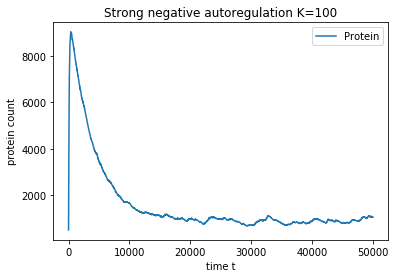

In [10]:
plt.plot(v,u[:,1])
plt.xlabel('time t')
plt.ylabel('protein count')
plt.legend(['Protein'],loc='upper right')
plt.title("Strong negative autoregulation K=100")

Weak neagative autoregulation

In [11]:
K=10000
kl=0.001
gr=0.0083
kp=0.17
gp=0.00028
k0=0.01
n=10
z,w=ssa(np.array([[500,500 ]]),50000)

Text(0.5, 1.0, 'Weak negative autoregulation K=100')

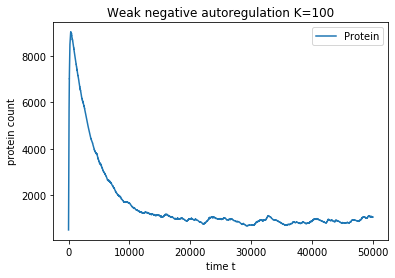

In [12]:
plt.plot(v,u[:,1])
plt.xlabel('time t')
plt.ylabel('protein count')
plt.legend(['Protein'],loc='upper right')
plt.title("Weak negative autoregulation K=100")